## Calculating the gradient manually

In [1]:
import numpy
import torch
import matplotlib.pyplot as plt

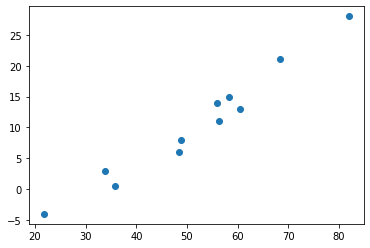

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

plt.scatter(t_u, t_c)

In [3]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [4]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
loss = loss_fn(t_p, t_c)

print("t_p =", t_p)
print("loss =", loss)

t_p = tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])
loss = tensor(1763.8848)


In [5]:
delta = 0.1
learning_rate = 1e-2

loss_rate_of_change_w = \
(loss_fn(model(t_u, w + delta, b), t_c) -
loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

loss_rate_of_change_b = \
(loss_fn(model(t_u, w, b + delta), t_c) -
loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

w = w - learning_rate * loss_rate_of_change_w
b = b - learning_rate * loss_rate_of_change_b

In [6]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

training_loop(n_epochs = 100, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]), t_u = t_u, t_c = t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([-44.1730,  -0.8260])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
    Params: tensor([2568.4011,   45.1637])
    Grad:   tensor([-261257.4062,   -4598.9702])
Epoch 3, Loss 19408029696.000000
    Params: tensor([-148527.7344,   -2616.3931])
    Grad:   tensor([15109614.0000,   266155.6875])
...
Epoch 10, Loss 90901105189019073810297959556841472.000000
    Params: tensor([3.2144e+17, 5.6621e+15])
    Grad:   tensor([-3.2700e+19, -5.7600e+17])
Epoch 11, Loss inf
    Params: tensor([-1.8590e+19, -3.2746e+17])
    Grad:   tensor([1.8912e+21, 3.3313e+19])


tensor([-1.8590e+19, -3.2746e+17])

In [7]:
training_loop(n_epochs = 100, learning_rate = 1e-4, params = torch.tensor([1.0, 0.0]), t_u = t_u, t_c = t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105247
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022667
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

In [8]:
t_un = 0.1*t_u
training_loop(n_epochs = 100, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]), t_u = t_un, t_c = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030489
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])


tensor([ 2.7553, -2.5162])

In [9]:
params = training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]), t_u = t_un, t_c = t_c, print_params = False)
params

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
...
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
...
Epoch 99, Loss 22.214186
Epoch 100, Loss 22.148710
...
Epoch 4000, Loss 2.927680
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012])

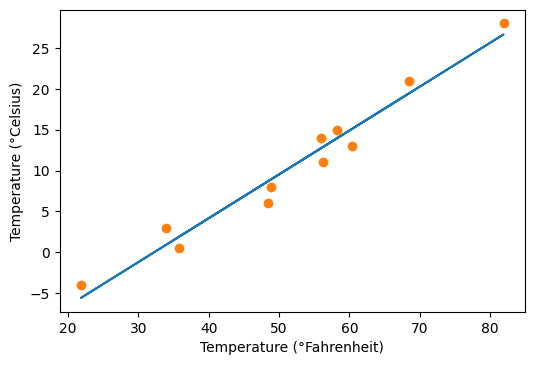

In [10]:
t_p = model(t_un, *params)
fig = plt.figure(dpi = 100)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

## Calculating the gradient using autograd

In [11]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

params = torch.tensor([1.0, 0.0], requires_grad=True)

In [12]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [13]:
training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0], requires_grad=True), t_u = t_un, t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [14]:
import torch.optim as optim

In [15]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

### Using a gradient descent optimizer

In [16]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [17]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(n_epochs = 5000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [18]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)
training_loop(n_epochs = 2000, optimizer = optimizer, params = params, t_u = t_un, t_c = t_c)

Epoch 500, Loss 2.962302
Epoch 1000, Loss 2.927647
Epoch 1500, Loss 2.927645
Epoch 2000, Loss 2.927646


tensor([  5.3677, -17.3048], requires_grad=True)

## Training, validation, and overfitting

In [19]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 3,  8,  0,  7, 10,  4,  1,  5,  2]), tensor([6, 9]))

In [20]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [21]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
    train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")
    return params

In [22]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs = 3000, optimizer = optimizer, params = params,
              train_t_u = train_t_un, val_t_u = val_t_un, train_t_c = train_t_c, val_t_c = val_t_c)

Epoch 1, Training loss 92.8238, Validation loss 24.2968
Epoch 2, Training loss 41.4546, Validation loss 7.2096
Epoch 3, Training loss 34.3515, Validation loss 10.2757
Epoch 500, Training loss 8.0515, Validation loss 2.1452
Epoch 1000, Training loss 3.4542, Validation loss 2.9397
Epoch 1500, Training loss 2.6258, Validation loss 4.3778
Epoch 2000, Training loss 2.4765, Validation loss 5.1867
Epoch 2500, Training loss 2.4496, Validation loss 5.5659
Epoch 3000, Training loss 2.4448, Validation loss 5.7332


tensor([  5.5790, -18.4106], requires_grad=True)

In [26]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad(): # <1>
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False # <2>
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")
    return params

In [28]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs = 3000, optimizer = optimizer, params = params,
              train_t_u = train_t_un, val_t_u = val_t_un, train_t_c = train_t_c, val_t_c = val_t_c)

Epoch 1, Training loss 92.8238, Validation loss 24.2968
Epoch 2, Training loss 41.4546, Validation loss 7.2096
Epoch 3, Training loss 34.3515, Validation loss 10.2757
Epoch 500, Training loss 8.0515, Validation loss 2.1452
Epoch 1000, Training loss 3.4542, Validation loss 2.9397
Epoch 1500, Training loss 2.6258, Validation loss 4.3778
Epoch 2000, Training loss 2.4765, Validation loss 5.1867
Epoch 2500, Training loss 2.4496, Validation loss 5.5659
Epoch 3000, Training loss 2.4448, Validation loss 5.7332


tensor([  5.5790, -18.4106], requires_grad=True)

## Exercise 2: Redefine the model to be w2 * t_u ** 2 + w1 * t_u + b.
### a. What parts of the training loop, and so on, need to change to accommodate this redefinition?
If we calculate the gradient manually, we have to add the gradients from loss (loss rate of change) for the new order.
If we use autograd, only need to add the new w2 into params.
### b. What parts are agnostic to swapping out the model?
The loss function and gradients of the old orders (b and w1)
### c. Is the resulting loss higher or lower after training?
Lower, because with the new order, the model can fit more.
### d. Is the actual result better or worse?
It's probably worse, as the original result is likely linear. A second-order model shall overfit.

In [60]:
def model_2(t_u, w_1, w_2, b):
    return w_2*t_u**2 + w_1*t_u + b

params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 5e-4
optimizer = optim.SGD([params], lr=learning_rate)

def training_loop_2(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model_2(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad(): # <1>
            val_t_p = model_2(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False # <2>
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"f" Validation loss {val_loss.item():.4f}")
    return params

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

training_loop_2(n_epochs = 5000, optimizer = optimizer, params = params,
              train_t_u = train_t_un, val_t_u = val_t_un, train_t_c = train_t_c, val_t_c = val_t_c)

Epoch 1, Training loss 713.4476, Validation loss 506.3548
Epoch 2, Training loss 64.4963, Validation loss 14.0288
Epoch 3, Training loss 18.6604, Validation loss 14.6187
Epoch 500, Training loss 6.0264, Validation loss 1.1048
Epoch 1000, Training loss 4.3560, Validation loss 0.8622
Epoch 1500, Training loss 4.0315, Validation loss 1.1490
Epoch 2000, Training loss 3.9457, Validation loss 1.3474
Epoch 2500, Training loss 3.9025, Validation loss 1.4532
Epoch 3000, Training loss 3.8672, Validation loss 1.5099
Epoch 3500, Training loss 3.8339, Validation loss 1.5443
Epoch 4000, Training loss 3.8012, Validation loss 1.5688
Epoch 4500, Training loss 3.7691, Validation loss 1.5891
Epoch 5000, Training loss 3.7374, Validation loss 1.6075


tensor([-1.1231,  0.6189, -1.7910], requires_grad=True)

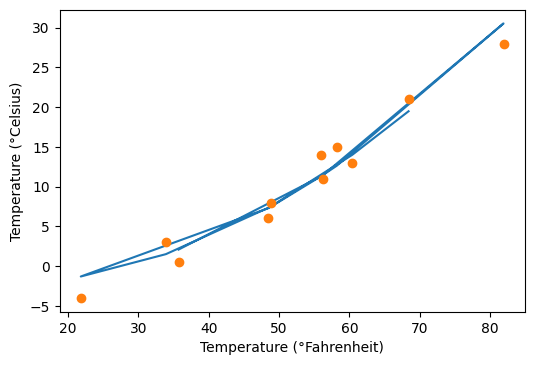

In [63]:
t_p = model_2(t_un, *params)
fig = plt.figure(dpi = 100)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')